<a href="https://colab.research.google.com/github/44REAM/CEB-image_processing/blob/main/Image_Fundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Fundamental

---

Slide Aj Ratchainan 1-3

In [ ]:
!git clone https://github.com/44REAM/CEB-image_processing.git
%cd /content/CEB-image_processing


Cloning into 'CEB-image_processing'...
remote: Enumerating objects: 343, done.
remote: Counting objects: 100% (204/204), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 343 (delta 117), reused 136 (delta 77), pack-reused 139
Receiving objects: 100% (343/343), 35.58 MiB | 16.37 MiB/s, done.
Resolving deltas: 100% (189/189), done.
/content/CEB-image_processing


In [ ]:
import numpy as np
import cv2
from copy import deepcopy

import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread('data/ct.jpeg')
print(f"image shape: {img.shape}")

ct_image = img[:,:,0]

image shape: (630, 522, 3)


# Image sampling and Quantization

**Definition**

To create a digital image, we need to convert the continuous sensed data into a digital format. This
requires two processes: sampling and quantization. Digitizing cordinate value is called sampling and digitized amplitude is called quantization. 

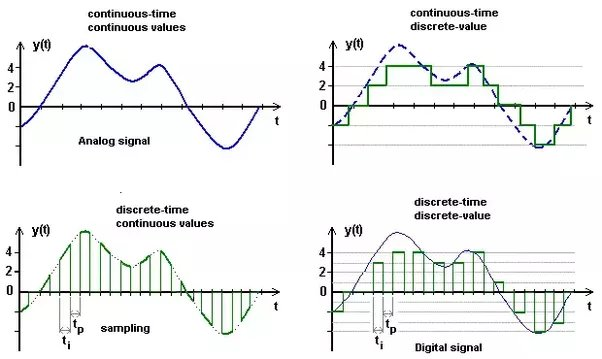

For digital image, we can represent a continuous image by a continuous function. After sampling and quantization, we convert a continuous image into digital image, f(x,y), with M rows and N columns, where (x,y) are discrete coordinates.

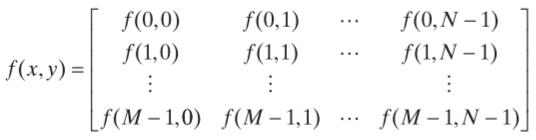

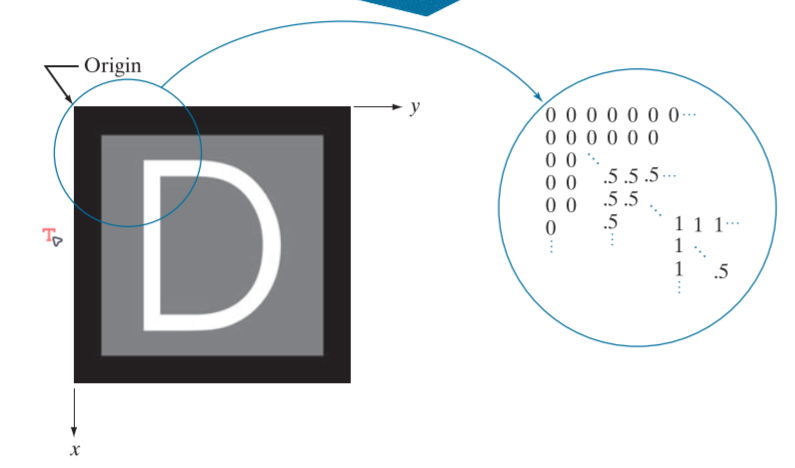

Lower sampling rate (decrete spatial resolution) cause bluring

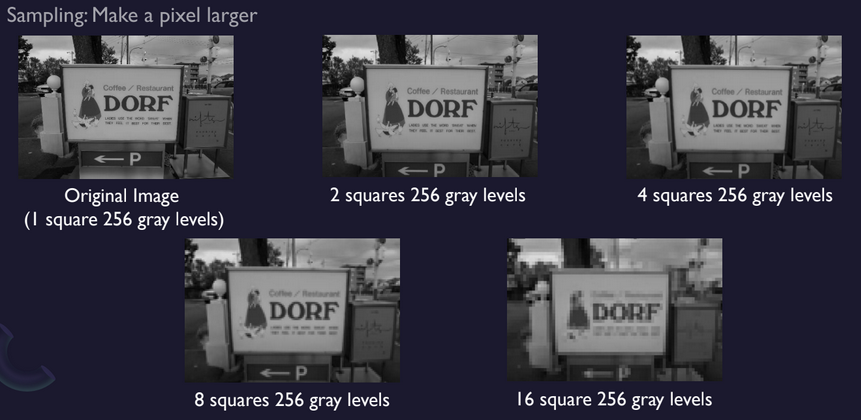

Lower quantization (decrete intensity resolution) cause low details

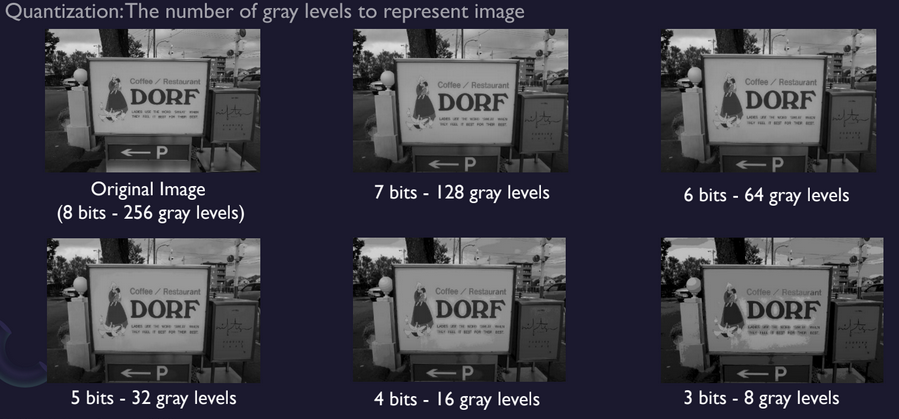

# Geometric operation

Geometric operation consist of two operation
1. Spatial transformation of coordinates
2. Intensity interpolation




## Transformation of coordinates

The transformation of coordinates can be written as

$$X' = T X$$


Where 
- X is input coordinates
- X' is output coordinates
- T is transformation operator

Example (Translation)


$
T = \begin{bmatrix}
1 & 0 & 0\\
0 & 1 & -400\\
0 & 0 & 1
\end{bmatrix}
$

Let our original coordinate of image at (0, 0) 

$X = \begin{bmatrix}
0 \\
0 \\
1 
\end{bmatrix}$

Then the transformed coordinates is

$X'= \begin{bmatrix}
0 \\
-400 \\
1 
\end{bmatrix}
$

transformed coordinate at (0,-400)

You can also written the transformation by

$
T = \begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}
 (.)$ + $
\begin{bmatrix}
0 \\
-400
\end{bmatrix},
$
$ X =
\begin{bmatrix}
0 \\
0 
\end{bmatrix}$,
$X'= \begin{bmatrix}
0 \\
-400
\end{bmatrix}
$



<Axes: ylabel='Count'>

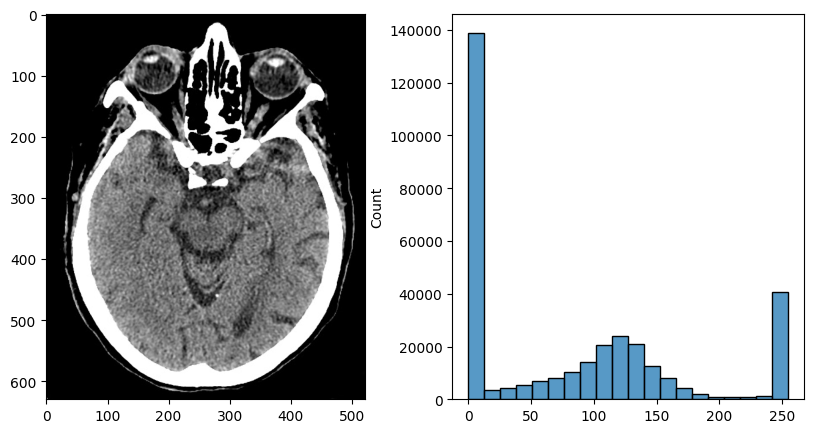

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))


axes[0].imshow(ct_image, cmap = 'gray')
sns.histplot(ct_image.ravel(), bins=20, ax = axes[1])

[[   1.    0.    0.]
 [   0.    1. -400.]]


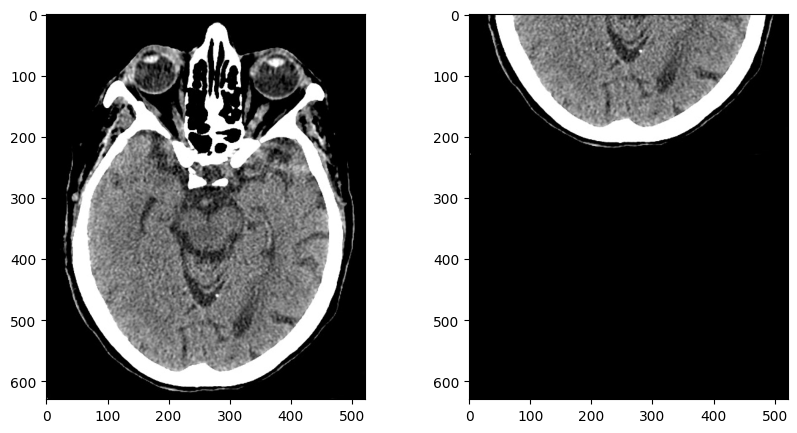

In [ ]:
# translation

rows,cols = ct_image.shape

# specify custom transformation matrix
T = np.float32([[1,0,0],[0,1,-400]])
image_size = (cols,rows)
dst = cv2.warpAffine(ct_image,T,image_size)

fig, axes = plt.subplots(1, 2, figsize = (10,5))

axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(dst, cmap = 'gray')

print(T)

# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

Rotation matrix

$$\begin{bmatrix}\cos \theta &-\sin \theta \\\sin \theta &\cos \theta \end{bmatrix}$$

[[   0.8660254     0.5        -122.53263039]
 [  -0.5           0.8660254   172.70199781]]


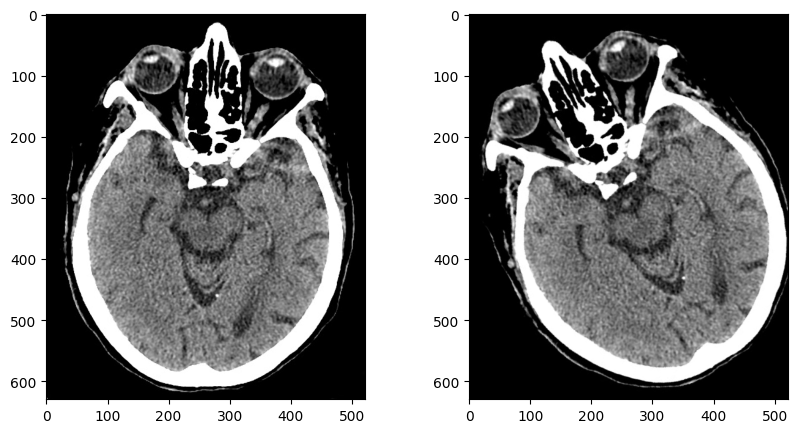

In [ ]:
# Rotation

rows,cols = ct_image.shape

center_of_rotation = (cols/2,rows/2)
angle = 30
scale = 1
M = cv2.getRotationMatrix2D(center_of_rotation,angle,scale)
dst = cv2.warpAffine(ct_image,M,(cols,rows))

print(M)

fig, axes = plt.subplots(1, 2, figsize = (10,5))
axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(dst, cmap = 'gray')

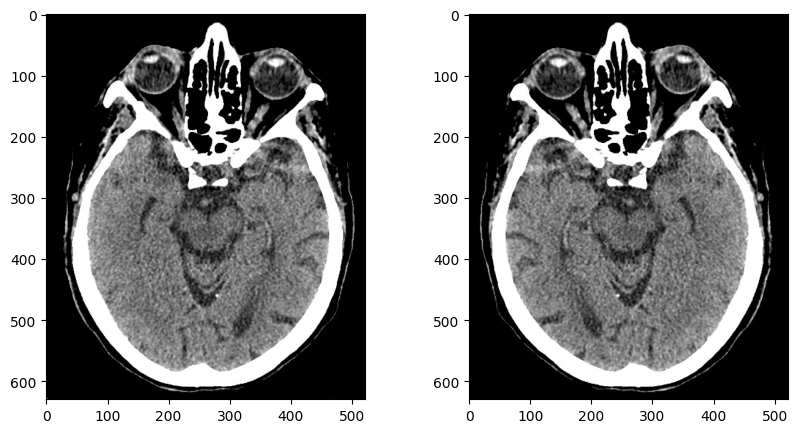

In [ ]:
# Flip

rows,cols = ct_image.shape

M = np.array([[-1.0, 0.0, cols],[0, 1, 0]])

dst = cv2.warpAffine(ct_image,M,(cols,rows))
fig, axes = plt.subplots(1, 2, figsize = (10,5))
axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(dst, cmap = 'gray')


### Linear transformation and affine transformation

In the context of linear algrebra, affine transformation is not linear map. In some context linear transformation and affine transformation is the same thing. The affine transformation is not linear because "Translation" not satifies linear transformation property.

Linear transformation property

1. preserve linear combinations
$$T(af(x) + bg(x)) = aT(f(x)) + bT(g(x))$$
2. $$T(\alpha v)=\alpha T(v) $$

However, we can make affine transformation linear by introduce homogeneous coordinates system.
$$\begin{bmatrix}
x\\
y
\end{bmatrix} -> \begin{bmatrix}
x\\
y\\
1
\end{bmatrix}$$

Affine transformation can be written in matrix form as below.

$$A = \begin{bmatrix}
a & b & t_x\\
c & d & t_y\\
0 & 0 & 1
\end{bmatrix}$$

**Definitions**

- **Affine transformation**: can be define as a composition of linear transformation and translation (since translation dose not preserve zero vector).
- **Rigid transformation**: defined as rotation and translation.
- **Similarity transformations**: defined as rotation, translation and scaling.

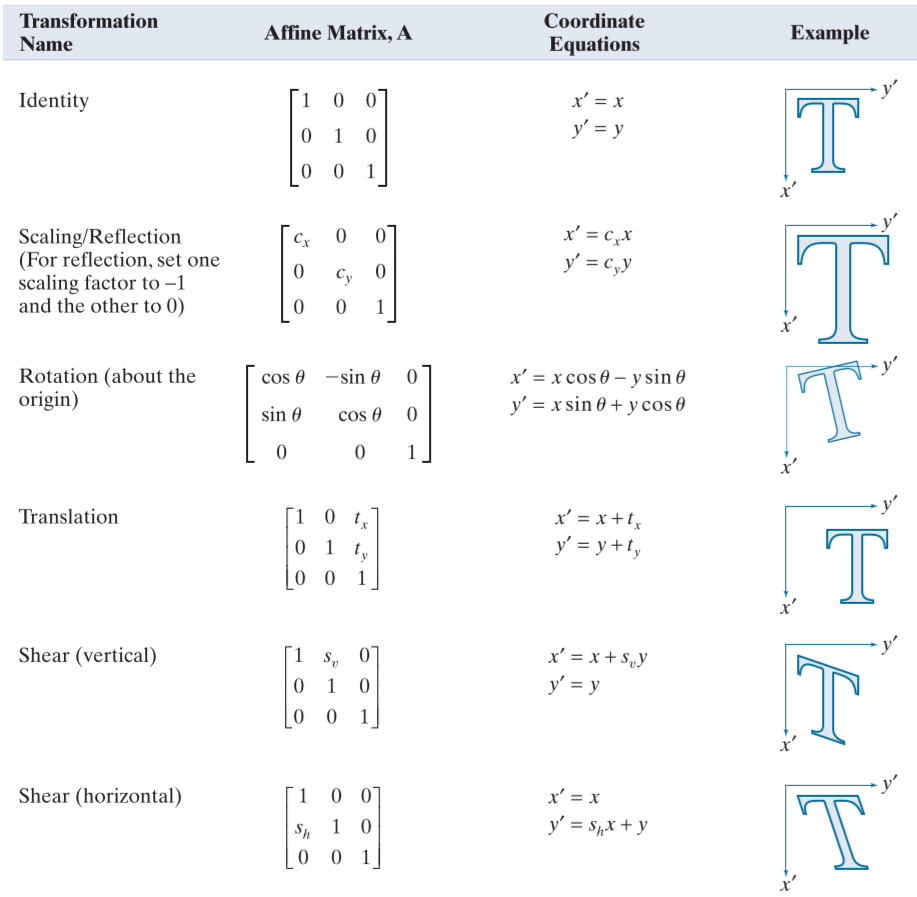

[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


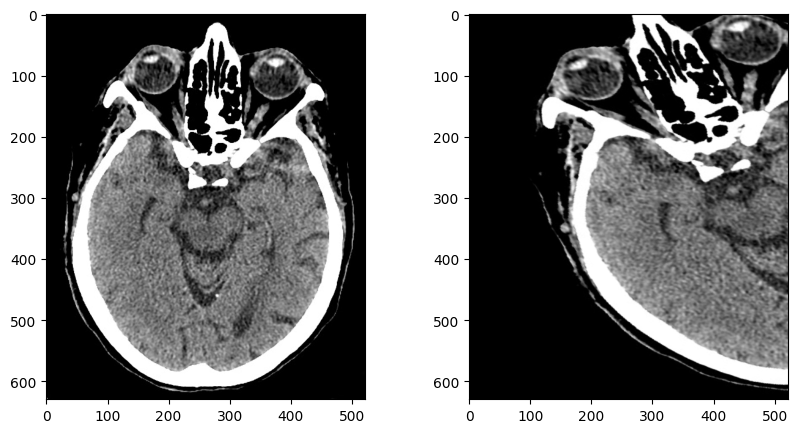

In [ ]:
# Affine transformation

rows,cols = ct_image.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
print(M)
dst = cv2.warpAffine(ct_image,M,(cols,rows))
fig, axes = plt.subplots(1, 2, figsize = (10,5))
axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(dst, cmap = 'gray')


### Projective/perspective transformation

Projective transformation also linear transformation (most general form of linear transformation) in image processing context.
Projective transformation can be written in matrix form as below

$$H = \begin{bmatrix}
h_1 & h_2 & h_3\\
h_4 & h_5 & h_6\\
h_7 & h_8 & h_9
\end{bmatrix}$$
Where $H$ is Homography
$$ \hat{X} = HX $$

$$\hat{X} = \begin{bmatrix}
h_1 & h_2 & h_3\\
h_4 & h_5 & h_6\\
h_7 & h_8 & h_9
\end{bmatrix} 
\begin{bmatrix}
x \\
y \\
1 
\end{bmatrix}$$
then normalize $\hat{X}$ to get $X'$
$$ X' = \begin{bmatrix}
\frac{h_1x + h_2y + h_3}{h_7x + h_8y + h_9} \\
\frac{h_4x + h_5y + h_6}{h_7x + h_8y + h_9} \\
1 
\end{bmatrix}$$



[[ 1.61168829e+00  1.40146808e-01 -9.93640866e+01]
 [ 1.19316347e-01  2.86359234e+00 -1.92815217e+02]
 [-3.13177020e-03  2.97194440e-03  2.00000000e+00]]


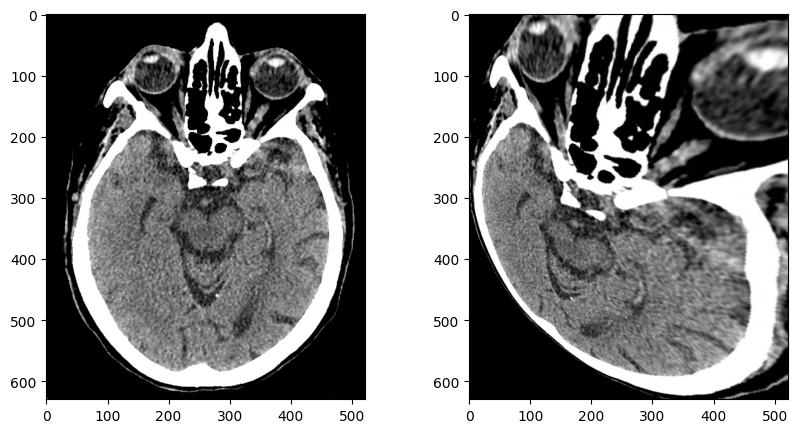

In [ ]:
rows,cols= ct_image.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[500,0],[0,300],[300,500]])

M = cv2.getPerspectiveTransform(pts1,pts2)
# M = np.array([[ 8.05844144e-01,  7.00734038e-02, -4.96820433e+01],
#  [ 5.96581737e-02,  1.43179617e+00, -9.64076087e+01],
#  [-1.56588510e-03,  1.48597220e-03,  1.00000000e+00]])*2
print(M)
dst = cv2.warpPerspective(ct_image,M,(cols,rows))

fig, axes = plt.subplots(1, 2, figsize = (10,5))
axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(dst, cmap = 'gray')

## Local transformation



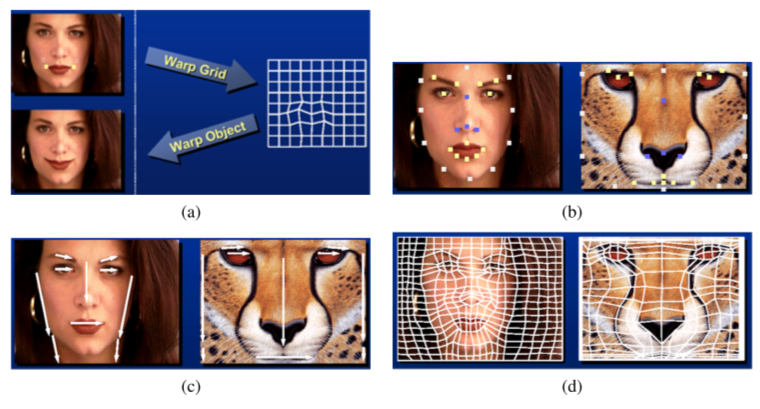



Consider, for example, changing the appearance of a face from a frown to a smile. What is needed in this case is to curve the corners of the mouth upwards while leaving the rest of the face intact. To perform such a transformation, different amounts of motion are required in
different parts of the image.

The transformation can be done by either control (such as b spline) or free-form deformation

Example

https://www.youtube.com/watch?v=N9BXpSzYCgQ

## Image interpolation

After coordinate transformation, we have to assign the intensity to new location. This task is call image interpolation.

Image interpolation is the process to estimate values at unknown location using known data. 
Example: The simplest interpolation algorithm is nearest neighbor algorithm. When we resize our original (size 500 × 500 pixel) image to 750 × 750 pixel, we create a grid of 750 × 750 pixel and assign the intensity to the point by select the most nearest point from original image.

**Common tasks that usually use interpolation**
- Resizing
- Geometric operation such as rotation and translation

You can check interpolation method in openCV by the link below

https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121

When you read the models description in pytorch, you may see that they also mention how they transform the image before use as input to deep learning model

https://pytorch.org/vision/stable/models/generated/torchvision.models.resnet50.html#torchvision.models.resnet50


Further reading/reference: https://www.mssc.mu.edu/~daniel/pubs/RoweTalkMSCS_BiCubic.pdf

### Bilinear interpolation

**1D linear interpolation**

model: $f(x) = a_0 + a_1x$

- Use 2 point for interpolation
- 2 equation, 2 unknown

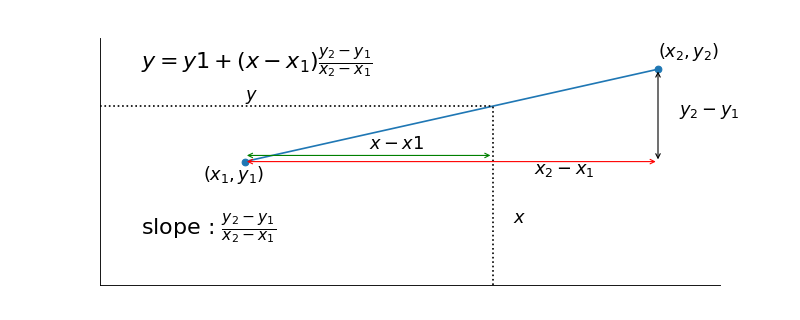

$$f(x_1) = a_0 + a_1*x_1$$
$$f(x_2) = a_0 + a_1*x_2$$

$$ y_1= a_0 + a_1*x_1$$
$$y_2 = a_0 + a_1*x_2$$



**2D Bilinear interpolation**

model: $f(x,y ) = \sum_{i = 0,j = 0}^{1,1} a_{i,j} x^iy^j$

- Use 4 points
- 4 equation, 4 unknown

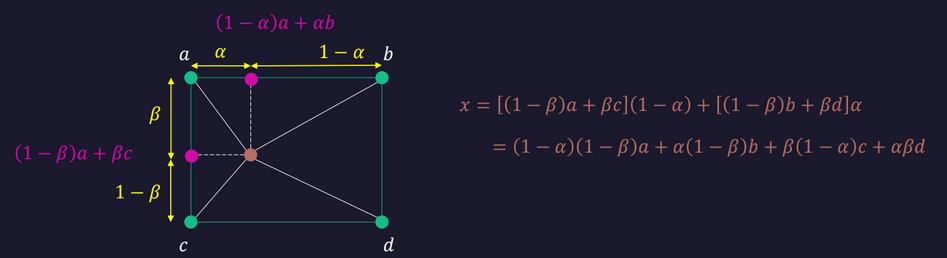

[[   1.    0.    0.]
 [   0.    1. -400.]]


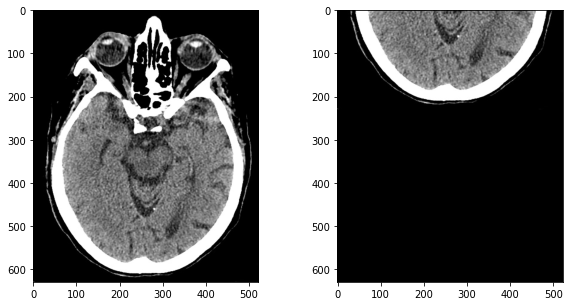

In [ ]:

# translation

rows,cols = ct_image.shape

M = np.float32([[1,0,0],[0,1,-400]])

dst = cv2.warpAffine(ct_image,M,(cols,rows), flags = cv2.INTER_LINEAR)

fig, axes = plt.subplots(1, 2, figsize = (10,5))

axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(dst, cmap = 'gray')

print(M)

# https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121

### Bicubic Interpolation

**1D cubic interpolation**

model: $f(x) = a_0 + a_1x + a_2x^2 + a_3x^3$

- Use 4 point for interpolation
- 4 equation, 4 unknown


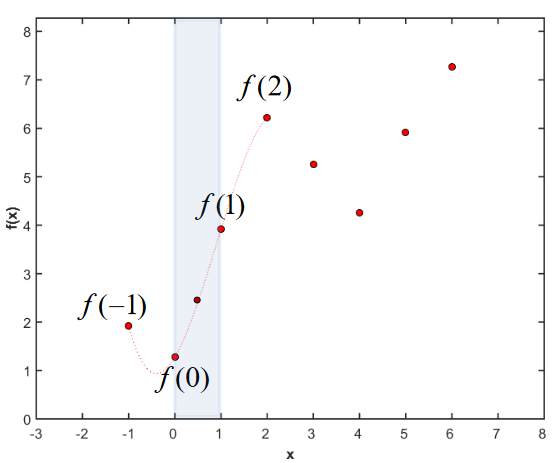

$$f(x_1) = a_0 + a_1x_1 + a_2x_1^2 + a_3x_1^3$$
$$f(x_2) = a_0 + a_1x_2+ a_2x_2^2 + x_2^3$$
$$ f(x_0)= a_0 + a_1x_0+ a_2x_0^2 + a_3x_0^3$$
$$ f(x_{-1}) = a_0 + a_1x_{-1}+ a_2x_{-1}^2 + a_3x_{-1}^3$$

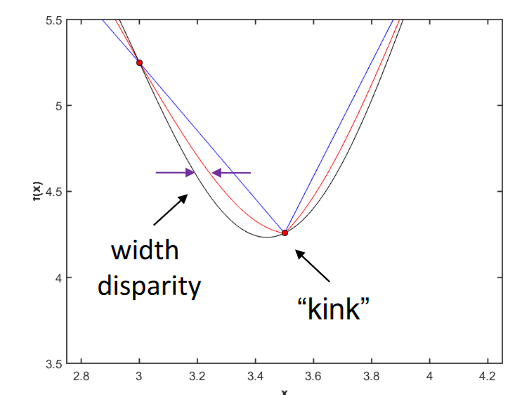

**1D cubic spline interpolation**

model: 

$f(x) = a_0 + a_1x + a_2x^2 + a_3x^3$

$f'(x) = a_1 + 2a_2x + 3a_3x^2$

- Use 2 point and 2 derivative for interpolation
- 4 equation, 4 unknown

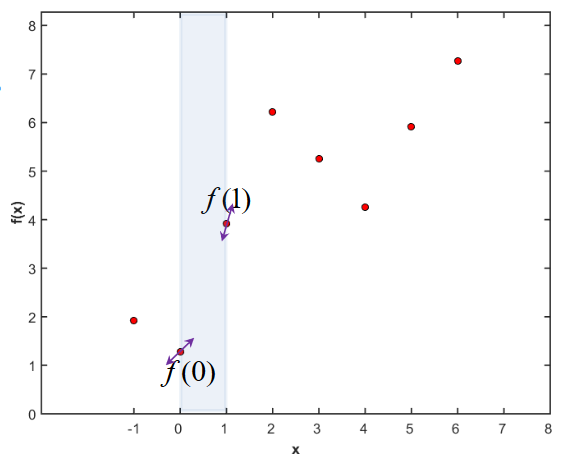

$$f(x_1) = a_0 + a_1x_1 + a_2x_1^2 + a_3x_1^3$$
$$ f(x_0)= a_0 + a_1x_0+ a_2x_0^2 + a_3x_0^3$$

$$f'(x_1) = \frac{f(x_2) - f(x_0)}{2} =  a_1 + 2a_2x_1 + 3a_3x_1^2$$
$$ f'(x_0) = \frac{f(x_1) - f(x_{-1} ) }{2} =  a_1 + 2a_2x_0 + 3a_3x_0^2$$

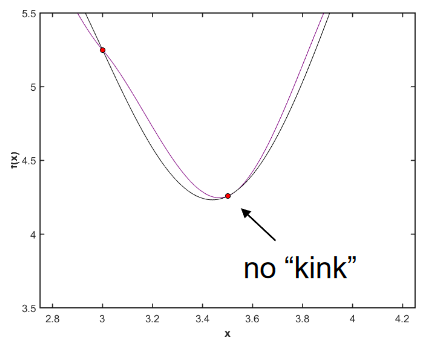



**2D bicubic interpolation**

model: $f(x,y ) = \sum_{i = 0,j = 0}^{3,3} a_{i,j} x^iy^j$

- Use 4 point for interpolation
- 16 equation, 16 unknown

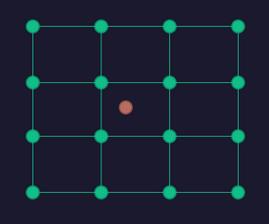

**2D bicubic spline interpolation**

model: 

$f(x,y ) = \sum_{i = 0,j = 0}^{3,3} a_{i,j} x^iy^j$

$ \frac{\partial f(x,y )}{ \partial y} = 
\sum_{i = 0,j = 0}^{3,3} a_{i,j} jx^iy^{j-1}$

$ \frac{\partial f(x,y )}{ \partial x} = 
\sum_{i = 0,j = 0}^{3,3} a_{i,j} ix^{i-1}y^{j}$

$ \frac{\partial^2 f(x,y )}{ \partial x \partial y} = 
\sum_{i = 0,j = 0}^{3,3} a_{i,j} ijx^{i-1}y^{j-1}$

- Use 4 point for interpolation
- 16 equation, 16 unknown